In [1]:
#Datos
import pandas as pd
import numpy as np
#Graficos 
import matplotlib.pyplot as plt
import seaborn as sns
#Preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score
#Otros 
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from IPython.display import Image

In [2]:
data = pd.read_csv('C:\Users\fran\Dropbox\Archivos\Data Science/produccion-de-carne-bovina.csv', delimiter=';', engine = 'python')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-2-f3113ea826bb>, line 1)

In [ ]:
data.head()

In [4]:
dfcria=data.loc[data['actividad'] == 'cria']
dfcria.shape

(1800, 21)

In [5]:
total = dfcria.isnull().sum().sort_values(ascending=False)
percent = (dfcria.isnull().sum()/dfcria.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
carga_(kg/ha),0,0.0
modelo,0,0.0
pais,0,0.0
provincia_id,0,0.0
provincia,0,0.0
departamento_id,0,0.0
departamento,0,0.0
prov_depto,0,0.0
ano,0,0.0
mes,0,0.0


In [6]:
dfcria = dfcria.drop(['modelo','pais','provincia_id','departamento_id','prov_depto','mes','referencia','pais_id'], axis=1)

In [7]:
dfcria.shape

(1800, 13)

In [8]:
cantprov = dfcria.groupby(['provincia'])['ano'].count()
cantprov.head(30).sort_values(ascending=False)

provincia
Buenos Aires           444
Santiago Del Estero    252
Chaco                  216
Cordoba                180
Corrientes             172
Salta                  144
La Pampa               120
Formosa                 96
San Luis                84
Entre Rios              60
Santa Fe                12
Chubut                  12
Rio Negro                8
Name: ano, dtype: int64

In [9]:
prov_dummie = pd.get_dummies(dfcria.provincia)
prov_dummie.head(10)

,Buenos Aires,Chaco,Chubut,Cordoba,Corrientes,Entre Rios,Formosa,La Pampa,Rio Negro,Salta,San Luis,Santa Fe,Santiago Del Estero
19,0,1,0,0,0,0,0,0,0,0,0,0,0
20,0,1,0,0,0,0,0,0,0,0,0,0,0
21,0,1,0,0,0,0,0,0,0,0,0,0,0
22,0,1,0,0,0,0,0,0,0,0,0,0,0
23,0,1,0,0,0,0,0,0,0,0,0,0,0
24,0,1,0,0,0,0,0,0,0,0,0,0,0
25,0,1,0,0,0,0,0,0,0,0,0,0,0
26,0,1,0,0,0,0,0,0,0,0,0,0,0
27,0,1,0,0,0,0,0,0,0,0,0,0,0
28,0,1,0,0,0,0,0,0,0,0,0,0,0


In [10]:
prov_dummie.shape

(1800, 13)

In [11]:
dfcria.departamento.replace(['Formosa'], ["FormosaDep"], inplace=True)

In [12]:
checkdep = dfcria.groupby(['departamento'])['ano'].count()
checkdep.head(50).sort_values(ascending=False)

departamento
Capital                          48
Belgrano                         24
Bermejo                          24
25 De Mayo                       24
Ayacucho                         24
General Guemes                   24
Avellaneda                       14
Castelli                         12
Canuelas                         12
Caleu Caleu                      12
Calamuchita                      12
Cafayate                         12
Cachi                            12
Brandsen                         12
General Guido                    12
Bella Vista                      12
Azul                             12
Atamisqui                        12
Almirante Brown                  12
Aguirre                          12
Adolfo Gonzales Chaves           12
2 De Abril                       12
12 De Octubre                    12
Cerrillos                        12
Chacabuco                        12
Chalileo                         12
Chascomus                        12
General Donovan

In [13]:
dep_dummie = pd.get_dummies(dfcria.departamento)
dep_dummie.head(10)

,1 De Mayo,12 De Octubre,2 De Abril,25 De Mayo,Adolfo Alsina,Adolfo Gonzales Chaves,Aguirre,Almirante Brown,Atamisqui,Avellaneda,...,Sauce,Silipica,Sobremonte,Tapalque,Tehuelches,Toay,Tordillo,Totoral,Tulumba,Utracan
19,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
dep_dummie.shape

(1800, 144)

In [15]:
dfcria = dfcria.join([prov_dummie, dep_dummie])

In [16]:
dfcria.head()

,provincia,departamento,ano,actividad,margen_bruto_($/ha),resultado_neto_($/ha),ingreso_neto_($/ha),gastos_directos_($/ha),costos_indirectos_($/ha),eficiencia_stock_(%),...,Sauce,Silipica,Sobremonte,Tapalque,Tehuelches,Toay,Tordillo,Totoral,Tulumba,Utracan
19,Chaco,1 De Mayo,2018,cria,608,127,823,215,482,23,...,0,0,0,0,0,0,0,0,0,0
20,Chaco,12 De Octubre,2018,cria,608,127,823,215,482,23,...,0,0,0,0,0,0,0,0,0,0
21,Chaco,2 De Abril,2018,cria,608,127,823,215,482,23,...,0,0,0,0,0,0,0,0,0,0
22,Chaco,25 De Mayo,2018,cria,608,127,823,215,482,23,...,0,0,0,0,0,0,0,0,0,0
23,Chaco,Bermejo,2018,cria,608,127,823,215,482,23,...,0,0,0,0,0,0,0,0,0,0


In [17]:
print("La cantidad de features nuevas agregadas a dataframe son = " + str(np.shape(prov_dummie)[1]+np.shape(dep_dummie)[1]))

La cantidad de features nuevas agregadas a dataframe son = 157


In [18]:
y = np.array(dfcria[["resultado_neto_($/ha)"]])

In [75]:
x = dfcria.drop(['actividad', 'departamento','provincia','ano','resultado_neto_($/ha)', 'margen_bruto_($/ha)'], axis=1)

In [76]:
np.shape(x)

(1800, 164)

In [91]:
x.columns

Index(['ingreso_neto_($/ha)', 'gastos_directos_($/ha)',
       'costos_indirectos_($/ha)', 'eficiencia_stock_(%)',
       'producción_(kg/ha)', 'destete_(%)', 'carga_(kg/ha)', 'Buenos Aires',
       'Chaco', 'Chubut',
       ...
       'Sauce', 'Silipica', 'Sobremonte', 'Tapalque', 'Tehuelches', 'Toay',
       'Tordillo', 'Totoral', 'Tulumba', 'Utracan'],
      dtype='object', length=164)

In [77]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.60, random_state=42)

In [78]:
xtrain.head()

,ingreso_neto_($/ha),gastos_directos_($/ha),costos_indirectos_($/ha),eficiencia_stock_(%),producción_(kg/ha),destete_(%),carga_(kg/ha),Buenos Aires,Chaco,Chubut,...,Sauce,Silipica,Sobremonte,Tapalque,Tehuelches,Toay,Tordillo,Totoral,Tulumba,Utracan
2245,665,114,205,25,41,65,162,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1674,811,214,173,33,34,70,102,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136,488,152,165,29,17,65,59,0,0,0,...,0,0,0,0,0,0,0,0,0,0
980,2462,318,815,31,92,72,293,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1702,422,104,178,27,17,55,65,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
xtrain.shape

(720, 164)

In [80]:
scaler = preprocessing.StandardScaler().fit(xtrain)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [81]:
xtrain_scal = scaler.transform(xtrain)  

In [82]:
xtest_scal = scaler.transform(xtest)  

In [83]:
lr = LinearRegression()

In [84]:
lr.fit(xtrain_scal, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [85]:
ypred = lr.predict(xtest_scal)

In [86]:
np.shape(ypred)

(1080, 1)

In [87]:
np.sqrt(mean_squared_error(ytest, ypred))

0.6941436057547569

In [88]:
np.sqrt(mean_squared_error(ytest, ypred))

0.6941436057547569

In [89]:
lr.score(xtrain_scal,ytrain)

0.9999986896008651

In [90]:
from sklearn.metrics import mean_absolute_error

In [73]:
mean_absolute_error(ytest, ypred)

0.5491140466083589

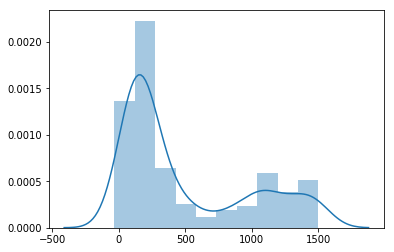

In [74]:
sns.distplot(ytest)
plt.show()